# Projeto 1 - Ciência dos Dados

#### Integrantes: Bruna Lima Meinberg, Henrique Krepel Foronda

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [490]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import os
import nltk 
from nltk.stem import RSLPStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bruna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Localização do diretório:

In [491]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/bruna/Desktop/2022.1/CDADOS/Projeto 1/22-1a-cd-p1-g_bruna_henrique


Carregando a base de dados com as notícias classificadas manualmente:

In [492]:
filename = 'dados.xlsx'

In [493]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.fillna('', inplace=True)
train.head(5)


,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Comprar ou vender?,SulAmérica (SULA11): Aquisição pela Rede D’Or ...,"A Rede D’Or (RDOR3) anunciou ontem, após o fec...",24/02/2022 - 13:03,14,1
1,Jornais,Confira as principais notícias dos jornais des...,Veja as principais manchetes desta quarta-feir...,23/02/2022 - 7:01,17,0
2,Tempo Real,Tempo Real: Shell deixa parceria com gigante e...,Boa tarde!,28/02/2022 - 8:50,11,2
3,Economia,Incerteza sobre inflação nos EUA é maior do qu...,A incerteza sobre inflação e a política monetá...,10/02/2022 - 8:42,34,2
4,Mercados,Ibovespa (IBOV) tem leve queda com tensões geo...,O principal índice da bolsa brasileira caía na...,18/02/2022 - 16:17,22,2


In [494]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Tempo Real,"Tempo Real: Ibovespa fecha em queda de 1,43%; ...",Boa tarde!,17/02/2022 - 8:02,24,2
1,Mercados,Ibovespa: As ações mais negociadas nesta manhã,O Ibovespa abriu o pregão desta quinta-feira (...,03/02/2022 - 10:24,43,0
2,Carteira Recomendada,10 ações com rendimento médio de dividendos de...,"Após apresentar uma valorização de 8,30% em su...",01/02/2022 - 14:11,46,1
3,Carteira Recomendada,"Commodities, varejo e setor financeiro: As 10 ...",A Toro Investimentos atualizou a carteira de a...,03/02/2022 - 14:02,43,0
4,Mercados,Ibovespa: JSL (JSLG3) e as ações mais negociad...,O Ibovespa abriu o pregão desta terça-feira (2...,22/02/2022 - 10:27,18,0


___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação das notícias (Target).

O grupo optou por classificar em:

0-Neutro

1-Positivo

2-Negativo

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

## Funções para limpeza das notícias


Além da função "cleanup" para retirar pontuações, também foi utilizado a de "StopWords" com o objetivo de retirar palaras recorrentes a todos que não agregam ao classificador

In [495]:
import re 
"""
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
"""

def cleanup(text):
    
    #import string
    punctuation = '[!-.:?;%)(\",_]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed.lower()

def RemoveStopWords(list_of_words):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    lista_filtrada = []
    for word in list_of_words:
        if word not in stopwords:
            lista_filtrada.append(word)
    return lista_filtrada

Limpando a parte do título e do primeiro parágrafo da parte de treinamento do dataframe

In [496]:
train.fillna('',inplace = True) 
test.fillna('',inplace = True)
train['Titulo']=train['Titulo'].apply(cleanup)
train['PrimeiroParag']=train['PrimeiroParag'].apply(cleanup)
test['Titulo']=test['Titulo'].apply(cleanup)
test['PrimeiroParag']=test['PrimeiroParag'].apply(cleanup)



##### Localizando as classificações no treinamento do dataframe e criando as tabelas (relativas, absolutas) que futuramente serão utilizadas no classificador

In [497]:
#Localizando
train_neutro=train.loc[train['Target']==0, :]
train_pos=train.loc[train['Target']==1, :]
train_neg=train.loc[train['Target']==2, :]

In [498]:
#Criando as tabelas absoluta e relativa das palavras do titulo (neutro)
todas_palavrasneu_tit = ''
for letran in train_neutro['Titulo']:
    todas_palavrasneu_tit += ' ' + letran
lista_todas_palavrasneu_tit=RemoveStopWords(todas_palavrasneu_tit.split())
serie_neutro_tit = pd.Series(lista_todas_palavrasneu_tit)
tabela_neutro_titulo = serie_neutro_tit.value_counts()
tabela_neutro_rel_titulo=serie_neutro_tit.value_counts(True)


In [499]:
#Criando as tabelas absoluta e relativa das palavras do primeiro parágrafo (neutro)
todas_palavrasneu_pp = ''
for letranp in train_neutro['PrimeiroParag']:
    todas_palavrasneu_pp += ' ' + letranp
lista_todas_palavrasneu_pp=RemoveStopWords(todas_palavrasneu_pp.split())
serie_neutro_pp = pd.Series(lista_todas_palavrasneu_pp)
tabela_neutro_primeiro_parag = serie_neutro_pp.value_counts()
tabela_neutro_rel_primeiro_parag=serie_neutro_pp.value_counts(True)

In [500]:
#Criando as tabelas absoluta e relativa das palavras do titulo (positivo)
todas_palavrasp_tit = ''
for letrap in train_pos['Titulo']:
    todas_palavrasp_tit += ' ' + letrap
lista_todas_palavrasp_tit=RemoveStopWords(todas_palavrasp_tit.split())
serie_pos_tit = pd.Series(lista_todas_palavrasp_tit)
tabela_pos_titulo = serie_pos_tit.value_counts()
tabela_pos_rel_titulo= serie_pos_tit.value_counts(True)

In [501]:
#Criando a tabela absoluta e relativa das palavras do primeiro parágrafo (positivo)
todas_palavrasp_pp = ''
for letrapp in train_pos['PrimeiroParag']:
    todas_palavrasp_pp += ' ' + letrapp
lista_todas_palavrasp_pp=RemoveStopWords(todas_palavrasp_pp.split())
serie_pos_pp = pd.Series(lista_todas_palavrasp_pp)
tabela_pos_primeiro_parag = serie_pos_pp.value_counts()
tabela_pos_rel_primeiro_parag=serie_pos_pp.value_counts(True)

In [502]:
#Criando a tabela absoluta e relativa das palavras do titulo (negativo)
todas_palavrasneg_tit = ''
for letran2 in train_neg['Titulo']:
    todas_palavrasneg_tit += ' ' + letran2
lista_todas_palavrasneg_tit=RemoveStopWords(todas_palavrasneg_tit.split())
serie_neg_tit = pd.Series(lista_todas_palavrasneg_tit)
tabela_neg_titulo = serie_neg_tit.value_counts()
tabela_neg_rel_titulo= serie_neg_tit.value_counts(True)

In [503]:
#Criando a tabela absoluta e relativa das palavras do primeiro paragrafo (negativo)
todas_palavrasneg_pp = ''
for letran2p in train_neg['PrimeiroParag']:
    todas_palavrasneg_pp += ' ' + letran2p
lista_todas_palavrasneg_pp=RemoveStopWords(todas_palavrasneg_pp.split())
serie_neg_pp = pd.Series(lista_todas_palavrasneg_pp)
tabela_neg_primeiro_parag = serie_neg_pp.value_counts()
tabela_neg_rel_primeiro_parag=serie_neg_pp.value_counts(True)

###### Checando a frequência relativa dos targets

In [504]:
train['Target'].value_counts(True)

1    0.383333
0    0.330000
2    0.286667
Name: Target, dtype: float64

###### Criando uma lista com todas palavras do título

In [505]:
list_palavras=lista_todas_palavrasneg_tit+lista_todas_palavrasp_tit+lista_todas_palavrasneu_tit

##### Criando uma série com todas palavras do título

In [506]:
#Série com todas palavras e sua tabela relativa
serie_portugues = pd.Series(list_palavras)
tabela_rel_portugues = serie_portugues.value_counts(True)

##### Calculando as probabilidades a priori

In [507]:
#Probabilidade do titulo ser positivo
prob_p_tit = len(serie_pos_tit)/len(serie_portugues)
prob_p_tit

0.39133600291226794

In [508]:
#Probabilidade do título ser neutro
prob_neu_tit = len(serie_neutro_tit)/len(serie_portugues)
prob_neu_tit

0.3269020749908992

In [509]:
#Probabilidade do título ser negativo
prob_neg_tit = len(serie_neg_tit)/len(serie_portugues)
prob_neg_tit

0.28176192209683293

In [510]:
#Verificando
p=prob_p_tit+prob_neu_tit+prob_neg_tit
p

1.0

___
## Verificando a performance do Classificador

Testando o classificador com a base de teste

### Função LaPLace
O objetivo da função LaPLace é garantir que nenhum probabilidade seja zerada

In [511]:
def laplace(palavra, tabela_cat_titulo, tabela_rel_portugues):
    if palavra not in tabela_cat_titulo:
        freq_palavra_cat=0
    else:
        freq_palavra_cat=tabela_cat_titulo[palavra]
    P_palavra_dado_cat=(freq_palavra_cat+1)/(sum(tabela_cat_titulo)+len(tabela_rel_portugues))
    return P_palavra_dado_cat


In [512]:
#Testando a função laplace
x=laplace('palavraqualquer', tabela_pos_titulo, tabela_rel_portugues)
print(x)
x1=laplace('palavraqualquer', tabela_neg_titulo, tabela_rel_portugues)
print(x1)
x2=laplace('ibovespa', tabela_pos_titulo, tabela_rel_portugues)
print(x2)

0.0004987531172069825
0.0005868544600938967
0.04488778054862843


Visto que nenhuma probabilidade é zerada, é possível montar o classificador:

In [513]:
lista_classifica_test=[]
for noticia in test.Titulo:
    palavras=noticia.split()
    
    prob_neg_dado_noticia=1
    prob_pos_dado_noticia=1
    prob_neu_dado_noticia=1
    for palavra in palavras:
        prob_neg_dado_noticia=prob_neg_dado_noticia*laplace(palavra, tabela_neg_titulo, tabela_rel_portugues)
        
    for palavra in palavras:
        prob_pos_dado_noticia=prob_pos_dado_noticia*laplace(palavra, tabela_pos_titulo, tabela_rel_portugues)
    
    for palavra in palavras:
        prob_neu_dado_noticia=prob_neu_dado_noticia*laplace(palavra, tabela_neutro_titulo, tabela_rel_portugues)
        
        
    prob_neg_dado_noticia*=prob_neg_tit
    prob_neu_dado_noticia*=prob_neu_tit
    prob_pos_dado_noticia*=prob_p_tit
    
    if prob_neg_dado_noticia>prob_pos_dado_noticia and prob_neg_dado_noticia>prob_neu_dado_noticia:
        lista_classifica_test.append(2)
    elif prob_neu_dado_noticia>prob_pos_dado_noticia and prob_neu_dado_noticia>prob_neg_dado_noticia:
        lista_classifica_test.append(0)
    elif prob_pos_dado_noticia>prob_neg_dado_noticia and prob_pos_dado_noticia>prob_neu_dado_noticia:
        lista_classifica_test.append(1)


In [514]:
serie_classifica_titulo=pd.Series(lista_classifica_test)
tabela_classifica_titulo_absoluta=serie_classifica_titulo.value_counts()
tabela_classifica_titulo_relativa=serie_classifica_titulo.value_counts(True)
tabela_classifica_titulo_relativa

2    0.355
0    0.350
1    0.295
dtype: float64

#### Agora, podemos checar o desempenho do classificador na base de teste:

In [515]:
test['Classificador']=serie_classifica_titulo
tabela = pd.crosstab(test['Target'], test['Classificador'], normalize='index')
tabela_of=tabela*100


total_acertos=0
for i in range(len(test)):
    if test['Target'][i]==test['Classificador'][i]:
        total_acertos=total_acertos+1
print('Porcentagem de acertos:{}%'.format(total_acertos*100/200))

print(tabela_of)
print('Porcentagem de verdadeiros neutros: {}'.format(tabela_of[0][0]))
print('Porcentagem de verdadeiros positivos: {}'.format(tabela_of[1][1]))
print('Porcentagem de verdadeiros negativos: {}'.format(tabela_of[2][2]))

Porcentagem de acertos:67.0%
Classificador          0          1          2
Target                                        
0              71.830986  15.492958  12.676056
1              16.438356  56.164384  27.397260
2              12.500000  12.500000  75.000000
Porcentagem de verdadeiros neutros: 71.83098591549296
Porcentagem de verdadeiros positivos: 56.16438356164384
Porcentagem de verdadeiros negativos: 75.0


### Concluindo

- Quando testado na parte de teste do dataframe, após utilizar as informações da parte do treinamento, o classificador apresenta um resultado satisfatório, visto que as categórias 'neutro' e 'negativo' apresentaram mais de 70% de acerto e a categoria 'positivo' apresentou mais de 55% de coerência;
- Mesmo apresentando um bom resultado, presumir que o classificador pode gerar mais resultados coerentes com diferentes notícias pode ser insensato visto que o classificador assume que as palavras se comportam de forma independente. Além disso, se fosse escolhida outra base de dados, com diversas outras notícias, utilizando esta base como treinamento, os resultados, provavelmente, seriam mais insatisfatórios ainda;
- Para tentativa de melhoria do algoritmo, seria possível considerar aquilo que está no primeiro parágrafo, contudo, pode ser que isso acabe por piorar a performance do classificador;


___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste



#### Juntando o dataframe

In [516]:
df_total = pd.merge(train,test.drop(columns=['Classificador']), how='outer') 
df_total

,Categoria,Titulo,PrimeiroParag,Data,Pagina,Target
0,Comprar ou vender?,sulamérica sula11 aquisição pela rede d’or rdo...,a rede d’or rdor3 anunciou ontem após o fecham...,24/02/2022 - 13:03,14,1
1,Jornais,confira as principais notícias dos jornais des...,veja as principais manchetes desta quartafeira 23,23/02/2022 - 7:01,17,0
2,Tempo Real,tempo real shell deixa parceria com gigante es...,boa tarde,28/02/2022 - 8:50,11,2
3,Economia,incerteza sobre inflação nos eua é maior do qu...,a incerteza sobre inflação e a política monetá...,10/02/2022 - 8:42,34,2
4,Mercados,ibovespa ibov tem leve queda com tensões geopo...,o principal índice da bolsa brasileira caía na...,18/02/2022 - 16:17,22,2
...,...,...,...,...,...,...
495,Carteira Recomendada,btg inclui itaú itub4 e ambipar ambp3 na carte...,o btg pactual bpac11 fez duas alterações em su...,30/01/2022 - 13:49,49,0
496,Gestoras de Recursos,lula moderado ajudou a turbinar bolsa em janei...,alguns dos principais gestores de multimercado...,15/02/2022 - 23:24,26,0
497,Investimentos,investidores ‘pragmáticos’ alimentam bolsa do ...,o expresidente do banco central do brasil gust...,17/02/2022 - 12:15,23,1
498,Mercados,ibovespa alterna perdas e ganhos na sessão mas...,o ibovespa operava sem direção clara nesta seg...,31/01/2022 - 13:06,48,1


#### Criando uma função para verificar a qualidade do classificador

In [517]:
def classifica(dataframe):
    proporciona=int(len(dataframe)*3/5)
    learn=dataframe.sample(n=proporciona)
    testa=pd.concat([dataframe, learn]).drop_duplicates(keep=False)

    neutro=learn.loc[learn['Target']==0, :]
    positivo=learn.loc[learn['Target']==1, :]
    negativo=learn.loc[learn['Target']==2, :]
    
    neutro2=testa.loc[testa['Target']==0, :]
    positivo2=testa.loc[testa['Target']==1, :]
    negativo2=testa.loc[testa['Target']==2, :]
    
    
    neu_tit=''
    for n in neutro['Titulo']:
        neu_tit += ' ' + n
    lista_neu_tit = RemoveStopWords(neu_tit.split())
    serie_neu2_tit = pd.Series(lista_neu_tit)
    tabela_neu_tit = serie_neu2_tit.value_counts()
    tabela_neu_rel_tit=serie_neu2_tit.value_counts(True)

    pos_tit=''
    for p in positivo['Titulo']:
        pos_tit += ' ' + p
    lista_pos_tit = RemoveStopWords(pos_tit.split())
    serie_pos2_tit = pd.Series(lista_pos_tit)
    tabela_pos_tit = serie_pos2_tit.value_counts()
    tabela_pos_rel_tit=serie_pos2_tit.value_counts(True)

    neg_tit=''
    for g in negativo['Titulo']:
        neg_tit += ' ' + g
    lista_neg_tit = RemoveStopWords(neg_tit.split())
    serie_neg2_tit = pd.Series(lista_neg_tit)
    tabela_neg_tit = serie_neg2_tit.value_counts()
    tabela_neg_rel_tit=serie_neg2_tit.value_counts(True)
    
    total=lista_neu_tit+lista_pos_tit+lista_neg_tit
    serie_total = pd.Series(total)
    tabela_total = serie_total.value_counts(True)
    
    prob_pos2_tit = len(serie_pos2_tit)/len(serie_total)
    prob_neu2_tit = len(serie_neu2_tit)/len(serie_total)
    prob_neg2_tit = len(serie_neg2_tit)/len(serie_total)
    
    lista_classifica=[]
    for noticia in testa.Titulo:
        palavras=noticia.split()

        prob_neg_dado_noticia=1
        prob_pos_dado_noticia=1
        prob_neu_dado_noticia=1
        for palavra in palavras:
            prob_neg_dado_noticia=prob_neg_dado_noticia*laplace(palavra, tabela_neg_tit, tabela_total)

        for palavra in palavras:
            prob_pos_dado_noticia=prob_pos_dado_noticia*laplace(palavra, tabela_pos_tit, tabela_total)

        for palavra in palavras:
            prob_neu_dado_noticia=prob_neu_dado_noticia*laplace(palavra, tabela_neu_tit, tabela_total)

    
        prob_neg_dado_noticia*=prob_neg2_tit
        prob_neu_dado_noticia*=prob_neu2_tit
        prob_pos_dado_noticia*=prob_pos2_tit

        if prob_neg_dado_noticia>prob_pos_dado_noticia and prob_neg_dado_noticia>prob_neu_dado_noticia:
            lista_classifica.append(2)
        elif prob_neu_dado_noticia>prob_pos_dado_noticia and prob_neu_dado_noticia>prob_neg_dado_noticia:
            lista_classifica.append(0)
        elif prob_pos_dado_noticia>prob_neg_dado_noticia and prob_pos_dado_noticia>prob_neu_dado_noticia:
            lista_classifica.append(1)
    
    serie_classifica=pd.Series(lista_classifica)
    testa['Classificador']=serie_classifica
    
    total_acertos2=0
    total_erros2=0

    for i in range(len(testa)):
        if testa.iloc[i, 5]==testa.iloc[i, 6]:
            total_acertos2=total_acertos2+1
        else:
            total_erros2=total_erros2+1
    lista_acertos_e_erros=[(total_acertos2/200)*100, (total_erros2/200)*100]
        


    return lista_acertos_e_erros

print(classifica(df_total))


[11.5, 88.5]


#### Criando uma função para rodar o classificador 200 vezes

()


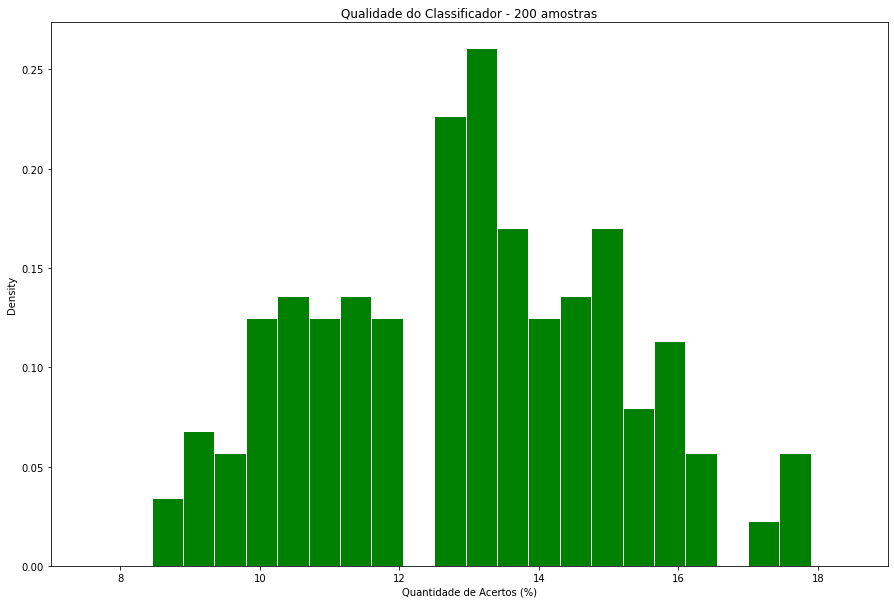

In [518]:
def roda_x(df, num):
    lista_acertos=[]
    lista_erros=[]
    total=''
    for i in range(0, num):
        rodar=classifica(df)
        lista_acertos.append(rodar[0])
        lista_erros.append(rodar[1])
        total=total+('O total de acertos é de {}% e de erros {}'.format(lista_acertos[i], lista_erros[i]))+ '\n'
    
    minimo = round(min(lista_acertos))
    maximo = round(max(lista_acertos))
    
    total_acertos = pd.Series(lista_acertos)
    
    faixa = arange(minimo,maximo,0.45)

    fig = plt.figure(figsize=(15, 10))
    plot = plt.hist(total_acertos, bins=faixa, density=True, 
                    color='green', edgecolor='white', alpha=1)
    plt.xlabel('Quantidade de Acertos (%)')
    plt.ylabel('Density')
    plt.title('Qualidade do Classificador - {} amostras'.format(num))
    plt.xlim(minimo-1, maximo+1)


    return ()
print(roda_x(df_total,200))


### Comentando a performance do classificador

- Por mais que a tentativa original na base de teste tenha apresentado bons resultados, quando aplicado em duzentas noticias aleatórias, depois de ter aprendido com outras trezentas notícias, os resultados tiveram um decaimento considerável, tendo resultados positivos de menos de 20%;
- Isso comprova o que foi concluido anteriormente. No caso, dependerá muito das palavras independentes e não de toda coesão textual;



___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas notícias. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas caterogias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por caterogia (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**